#Heart Disease Prediction using Neural Networks

#**Defining the Question**

**Overview**

Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmias) and heart defects you’re born with (congenital heart defects), among others.https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

**a)Specifying the Research question**

This weeks project will focus on predicting heart disease using neural networks. Based on attributes such as blood pressure, cholesterol levels, heart rate, and other characteristic attributes, patients will be classified according to varying degrees of coronary artery disease. This project will utilize a dataset of 303 patients and distributed by the UCI Deep Learning Repository.

**b)Defining the metrics of success**

We will need to build a neural network model that corrrectly predicts the likelihood of heart disease occurence.
We will need to find the best parameter and evaluate the performance based on the accuracy score and confusion metrics. We will aim for an accuracy score of at least 80%

**c) Understanding the context**

Heart disease often develops over time. You may have early signs or symptoms long before you have serious heart problems. Or, you may not realize you are developing heart disease. The warning signs of heart disease may not be obvious. Also, not every person has the same symptoms.

Certain symptoms, such as chest pain, ankle swelling, and shortness of breath may be signals that something is wrong. Learning the warning signs can help you get treatment and help prevent a heart attack or stroke.


**Data Glossary**

Age.
Sex: 1 = Male, 0 = Female.
(cp) chest pain type (4 values – Ordinal), 1st value: typical angina, 2nd value: atypical angina, 3rd value: non-anginal pain, 4th value: asymptomatic.
(trestbps) resting blood pressure.
(chol) serum cholesterol.
(Fbs) – fasting blood sugar > 120 mg/dl. 
(restecg) – resting electrocardiography results.
(thalach) – maximum heart rate achieved. 
(exang) – exercise-induced angina.
(oldpeak) – ST depression caused by exercise relative to rest.
(slope) – the slope of the peak exercise ST segment.
(ca) – the number of major vessels colored by fluoroscopy.
(thal) – maximum heart rate achieved (Ordinal), 3 = normal, 6 = fixed defect, 7 = reversible defect.

**d) Recording the Experimental Design**

* Defining the question
* Data Preparation
* Data Cleaning
* Exploratory data analysis
* Modelling
* Optimization
* Challenging the solution
* Conclusion

#**Data Preparation**

**Importing the libraries**

In [ ]:
#Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


**Loading the dataset**

In [ ]:
data= pd.read_csv('heart.csv')

**Accessing basic information about our dataset**

In [ ]:
## Previewing the first ten records of our data

data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# Previewing the last 10 records of our dataset

data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# getting information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#getting shape of our dataset
data.shape

(303, 14)

In [ ]:
#viewing our columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#checking data types of our columns
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

All columns seem to be in their right data types

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
##Checking for unique values

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

for col in cols:
  print(col)
  print(data[col].unique())
  print('\n')

age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


sex
[1 0]


cp
[3 2 1 0]


trestbps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]


chol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]


fbs
[

In [ ]:
#defining our columns' unique values and column names
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Our dataset has 303 records and  14 attributes including the target attribute labeled target. The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.

**Validation of data**

#**Tidying the dataset**

**Missing values**

In [ ]:
#checking missing values
data.isnull().sum().sort_values(ascending=False)

#Our dataset has no missing values

target      0
thal        0
ca          0
slope       0
oldpeak     0
exang       0
thalach     0
restecg     0
fbs         0
chol        0
trestbps    0
cp          0
sex         0
age         0
dtype: int64

**Checking for duplicates**

In [ ]:
#we will look for the number of rows with duplicate records in our dataset
print(data.duplicated().sum())

1


In [ ]:
#
print(data[data.duplicated()].head())

     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
164   38    1   2       138   175    0  ...      0      0.0      2   4     2       1

[1 rows x 14 columns]


In [ ]:
#We will not be dropping the record

**Checking for outliers**

In [ ]:
columns = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]
Q1 = columns.quantile(0.25)
Q3 = columns.quantile(0.75)
IQR = Q3 - Q1
((columns < (Q1 - 1.5 * IQR)) | (columns > (Q3 + 1.5 * IQR))).sum()

age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          25
thal         2
target       0
dtype: int64

We need to domain knowledge to discern whether to drop the records or not as they may be values that lie in the range of features related to heart disease detection. We will not drop the outliers yet.

#**Exploratory data Analysis**

##Univariate Analysis

**Description**

In [ ]:
#summary description of our dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Measures of Central Tendancy**

In [ ]:
#MEAN
for i, col_val in enumerate(columns):
 print('The mean of ' + str(col_val) + ' ' + 'is' + ' ' + str(columns[col_val].mean()))

The mean of age is 54.366336633663366
The mean of sex is 0.6831683168316832
The mean of cp is 0.966996699669967
The mean of trestbps is 131.62376237623764
The mean of chol is 246.26402640264027
The mean of fbs is 0.1485148514851485
The mean of restecg is 0.528052805280528
The mean of thalach is 149.64686468646866
The mean of exang is 0.32673267326732675
The mean of oldpeak is 1.0396039603960396
The mean of slope is 1.3993399339933994
The mean of ca is 0.7293729372937293
The mean of thal is 2.3135313531353137
The mean of target is 0.5445544554455446


In [ ]:
#Mode
for i, col_val in enumerate(columns):
 print('The mode of ' + str(col_val) + ' ' + 'is' + ' ' + str(columns[col_val].mode()))

The mode of age is 0    58
dtype: int64
The mode of sex is 0    1
dtype: int64
The mode of cp is 0    0
dtype: int64
The mode of trestbps is 0    120
dtype: int64
The mode of chol is 0    197
1    204
2    234
dtype: int64
The mode of fbs is 0    0
dtype: int64
The mode of restecg is 0    1
dtype: int64
The mode of thalach is 0    162
dtype: int64
The mode of exang is 0    0
dtype: int64
The mode of oldpeak is 0    0.0
dtype: float64
The mode of slope is 0    2
dtype: int64
The mode of ca is 0    0
dtype: int64
The mode of thal is 0    2
dtype: int64
The mode of target is 0    1
dtype: int64


We note that the chol colum(serum cholestrol) is trimodal with 197, 204 and 234 being the common levels whereas all the rest of the columns are unimodal. Also the mode of age(58) is roughly around the mean of the age(54.6). The mode of our target column being 1 meaning most people showed presence of heart disease.

In [ ]:
#MEDIAN

for i, col_val in enumerate(columns):
 print('The median of ' + str(col_val) + ' ' + 'is' + ' ' + str(columns[col_val].median()))

The median of age is 55.0
The median of sex is 1.0
The median of cp is 1.0
The median of trestbps is 130.0
The median of chol is 240.0
The median of fbs is 0.0
The median of restecg is 1.0
The median of thalach is 153.0
The median of exang is 0.0
The median of oldpeak is 0.8
The median of slope is 1.0
The median of ca is 0.0
The median of thal is 2.0
The median of target is 1.0


**Measures of dispersion**

In [ ]:
#SKEWNESS

for i, col_val in enumerate(columns):
 print('The Skewness of ' + str(col_val) + ' ' + 'is' + ' ' + str(columns[col_val].skew()))

The Skewness of age is -0.2024633654856539
The Skewness of sex is -0.791335191480832
The Skewness of cp is 0.48473236883889675
The Skewness of trestbps is 0.7137684379181465
The Skewness of chol is 1.1434008206693387
The Skewness of fbs is 1.986651930914452
The Skewness of restecg is 0.16252224492761935
The Skewness of thalach is -0.5374096526832253
The Skewness of exang is 0.7425315444212832
The Skewness of oldpeak is 1.269719930601997
The Skewness of slope is -0.5083156098165442
The Skewness of ca is 1.3104221354767875
The Skewness of thal is -0.47672219490975737
The Skewness of target is -0.17982105403495655


In [ ]:
#Kurtosis

for i, col_val in enumerate(columns):
 print('The kurtosis of ' + str(col_val) + ' ' + 'is' + ' ' + str(columns[col_val].kurt()))

The kurtosis of age is -0.5421671409908408
The kurtosis of sex is -1.3829609835171006
The kurtosis of cp is -1.1930709803257231
The kurtosis of trestbps is 0.9290540528369715
The kurtosis of chol is 4.505423167753712
The kurtosis of fbs is 1.9596776292633504
The kurtosis of restecg is -1.3626733034314487
The kurtosis of thalach is -0.06196993057611566
The kurtosis of exang is -1.4583166825574485
The kurtosis of oldpeak is 1.5758130733382507
The kurtosis of slope is -0.6275207472668787
The kurtosis of ca is 0.8392531871665225
The kurtosis of thal is 0.2979148532922311
The kurtosis of target is -1.9807828625705264




1.   Most of our features have a  positively skewed distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.
2.   Our SibSp and Parch and Fare have a leptokurtic distribution which shows heavy tails on either side, indicating large outliers.



In [ ]:
##RANGE

x = {}

for col in columns:
    x[col] = data[col].max()- data[col].min()
range_= pd.Series(x)
range_

age          48.0
sex           1.0
cp            3.0
trestbps    106.0
chol        438.0
fbs           1.0
restecg       2.0
thalach     131.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

In [ ]:
##Standard Deviation

x = {}

for col in columns:
    x[col] = data[col].std()
standard_dev_= pd.Series(x)
standard_dev_

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64

**Univariate analysis visualization**

In [ ]:
#Frequency table of our target variable
data.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

45.54% of the target population do not have heart problems.

54.45% of the target population has heart problems.

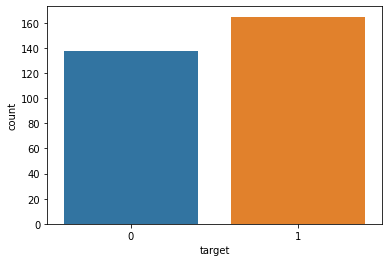

In [ ]:
#Visualizing our target variable
y = data["target"]

sns.countplot(y)


Our target variable has a binary output of 0 and 1 confirming that this is a classification problem.

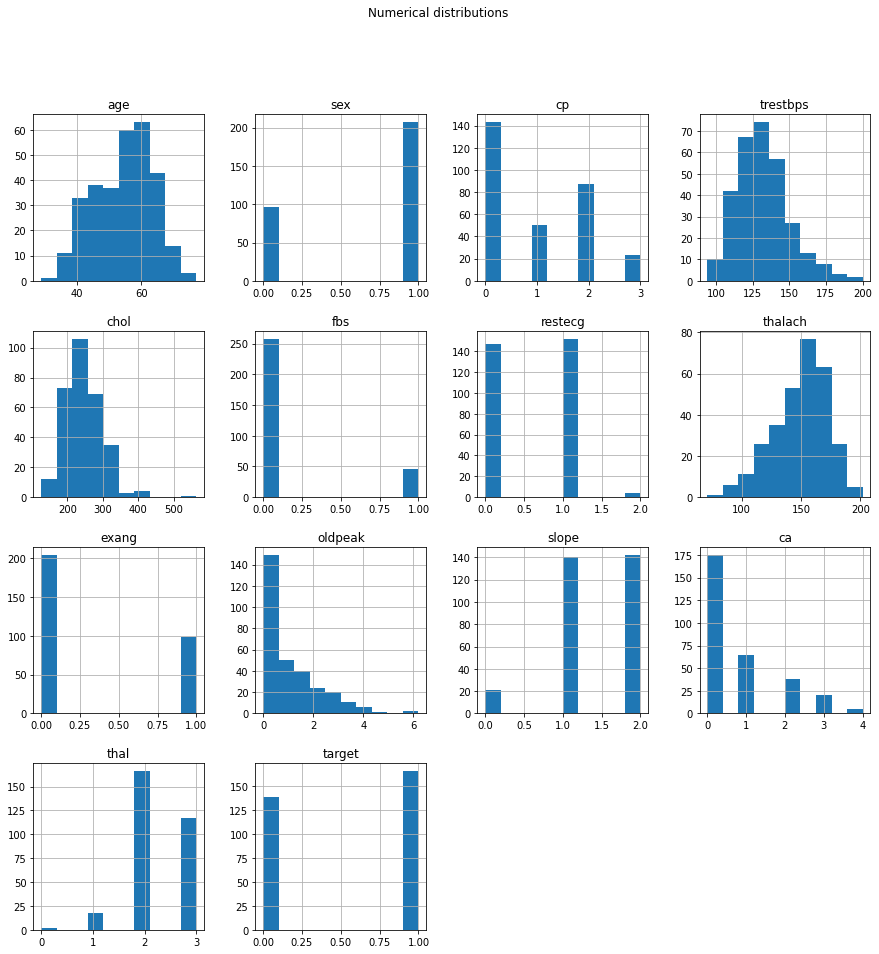

In [ ]:
#plotting histograms to get the distribution of the data
data.hist(bins=10, figsize=(15,15))
plt.suptitle("Numerical distributions")
plt.savefig('Histogram')
plt.show()

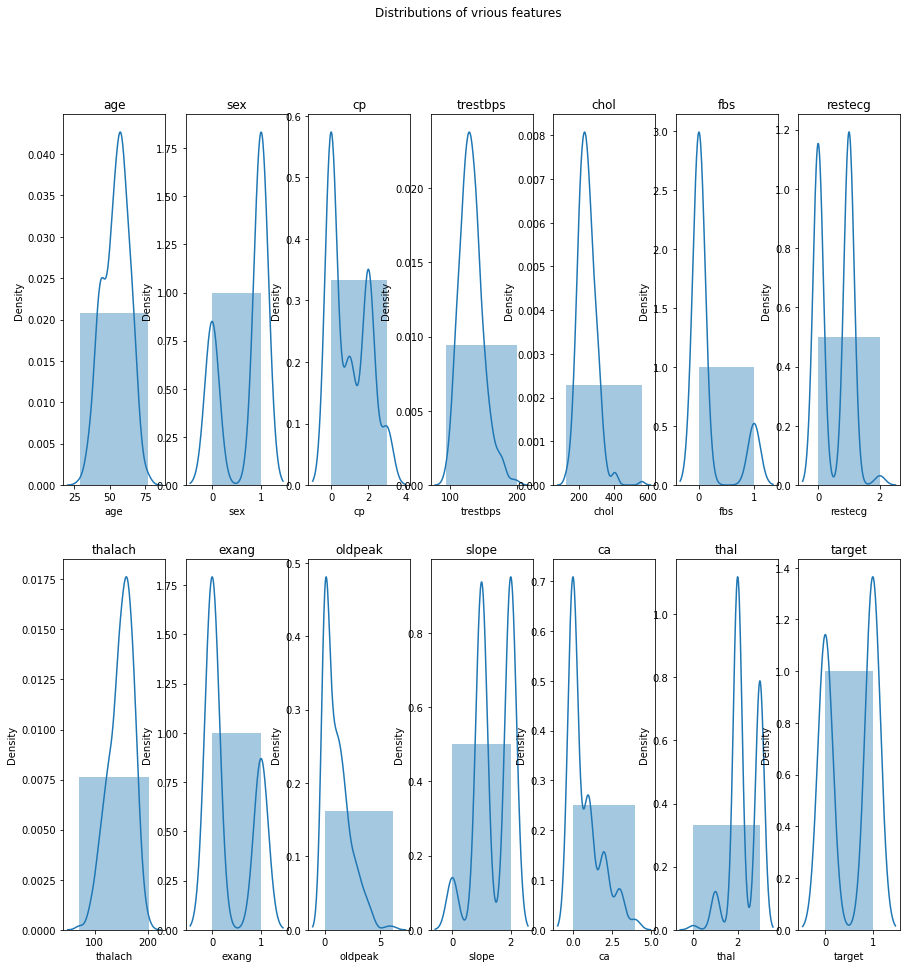

In [ ]:
#plotting distribution plots of our columns
fig, axes = plt.subplots(nrows=2, ncols=7, figsize = (15,15))
fig.subplots_adjust(hspace=0.2)
fig.suptitle('Distributions of vrious features')

for ax, values, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.distplot(values, ax=ax, bins=len(np.unique(data.values.T[1]))//2)
    ax.set(title="{}".format(name), xlabel=name)

From our histograms and dist plots it is clear that our dataset is not normally distributed.

##**Bivariate Analysis**

Exploring the relationship between our y variable and the different features in our dataset

*'Sex' Feature*

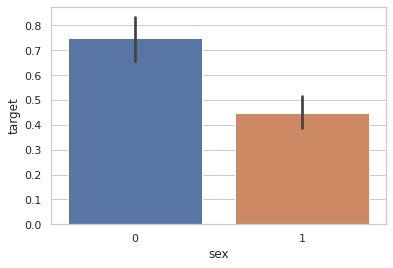

In [ ]:
#Sex/Target visualizations
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='sex', y='target', data=data)

Females are more likely to have heart problems compared to males

*CP (Chest Pains)*

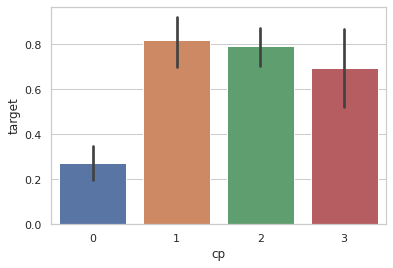

In [ ]:
##'cp'/chest pains / y

sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='cp', y='target', data=data)

Those with atypical angina are more likely to have heart problems compared to those with normal angina

*fbs (fasting blood sugar)*

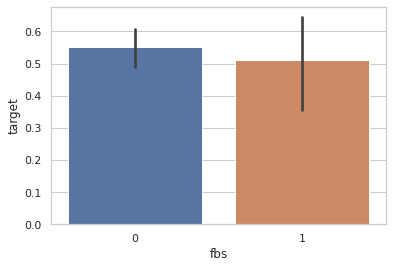

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='fbs', y='target', data=data)

*restecg (resting electrocardiographic results)*

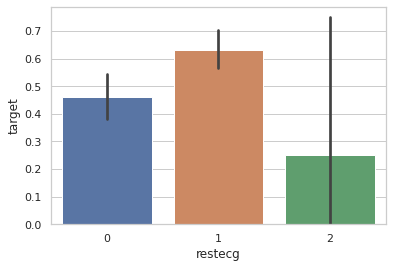

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='restecg', y='target', data=data)

*exang (exercise induced angina)*

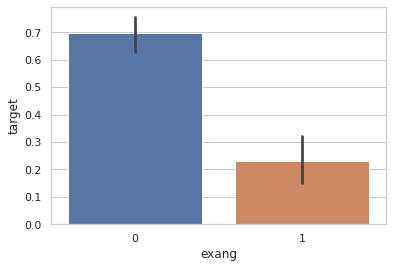

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='exang', y='target', data=data)

*slope (slope of peak exercise st segment)*

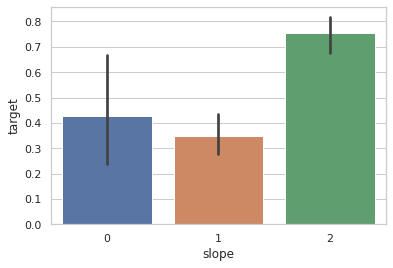

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='slope', y='target', data=data)

thal (displays the thalassemia)

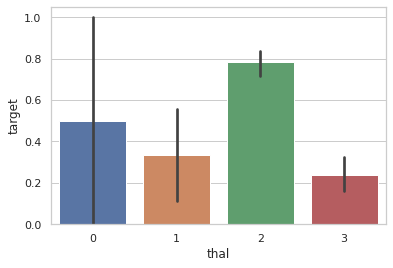

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='thal', y='target', data=data)

Heart disease per age

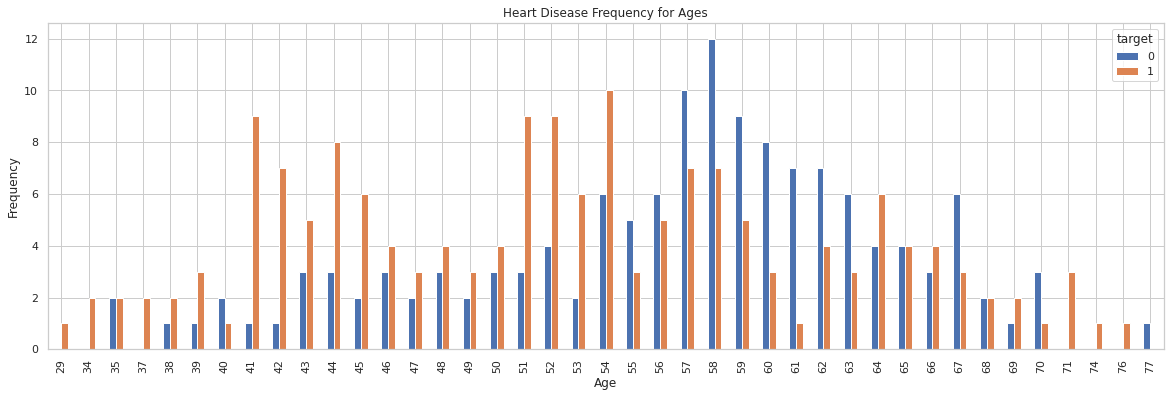

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

*Distribution of age vs sex with the target class*

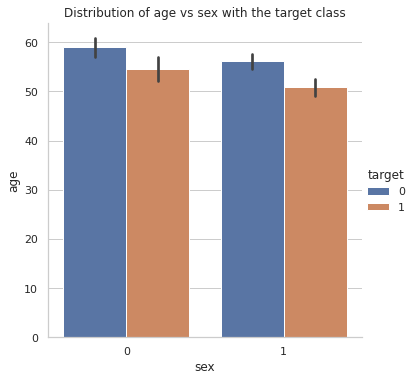

In [ ]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = data, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

We see that for females who are suffering from the disease are older than males.

**Correlation**

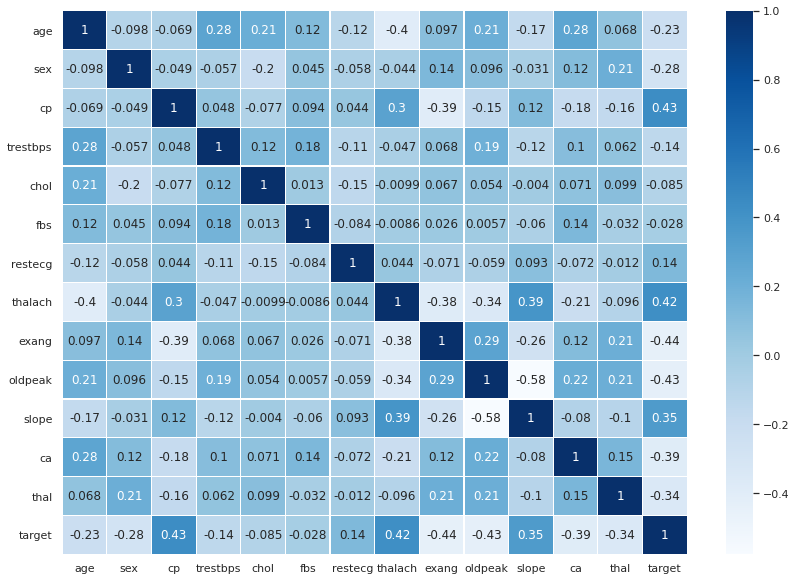

In [ ]:
# Ploting a correlation heatmat using seaborn 

colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), cmap=colormap, annot=True, linewidths=0.2)

In [ ]:
corr= data.corr()

corr_list= corr['target'].sort_values(axis=0,ascending=False)
corr_list

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

Our features are moderatly correlated with our target feature

#**Implementing the Solution**

In [ ]:
##Declaring our X and Y variables

X = data.drop('target', axis=1)
y = data.target


In [ ]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=10)

In [ ]:
# Feature Scaling
#One of the most important operations that we must perform before we give the complete dataset to the machine learning model would be either to scale 
#the features or normalize them so that we would not run into errors in the process.
#Multi-Layer Perceptron class is very sensitve to feature scaling, thus it is always a good habit to sclae our data.
#However, feature scaling is only fitted on the training data and not the test data. This is due to the fact that in real world data is not scaled and the major purpose of neural networks is to make predictions on real world data. Hence we try as musch as possible to keep the test data real.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Building our Model**

*Importing libraries*

In [ ]:
# Importing libraries

import pandas as pd
from sklearn.model_selection import train_test_split
# Import a standardization library
from sklearn.preprocessing import StandardScaler
# Import an Multi-Layer Perceptron Classifier model estimator from Scikit-Learn's neural_network library
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report



Multi-Layer Perceptron Classifier

In [ ]:
# Creating an instance of the model
# The MLPClassifier takes in a number of arguments but we are only going to use the hidden layers
# For the hidden_layer_sizes we pass in a tuple that consist the number of neurons we want each layer to have. 
#The nth number of the tuple represents the number of layers you want your network to have.
# For us, we will choose 3 layers with the same number of neurons


mlp = MLPClassifier(hidden_layer_sizes = (13, 13,13), max_iter = 500)

# fitting the data
mlp.fit(X_train,y_train)



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Prediction and evaluation

In [ ]:
# Now that we have our model in place, let's do the prediction

pred = mlp.predict(X_test)

mlp_nn = metrics.accuracy_score(pred,y_test)*100

# Evaluating the performance of ur model

print('The accuracy of the model is ',metrics.accuracy_score(y_test, pred))

print (confusion_matrix(y_test,pred))

print('-----------------------------------------------')

print(classification_report(y_test,pred))

The accuracy of the model is  0.7540983606557377
[[28  7]
 [ 8 18]]
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.72      0.69      0.71        26

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [ ]:
# Extracting the weights and bias vectors

# Checking the number of weights 
len(mlp.coefs_) 

# Checking the number of biases 
len(mlp.intercepts_) 

4

*Hyperparameter Tuning with Gridsearch*

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.802 (+/-0.093) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.822 (+/-0.044) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.806 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.839 (+/-0.055) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.843 (+/-0.048) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.847 (+/-0.064) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver':

In [ ]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.79      0.73      0.76        26

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.80        61
weighted avg       0.80      0.80      0.80        61



#**Challenging the Solution**

*Building our neural network model using keras*

In [ ]:
#Importing our libraries

import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
##Declaring our X and Y variables

X = data.drop('target', axis=1)
y = data.target

In [ ]:
X.shape

(303, 13)

In [ ]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Since this is a binary classification problem (onset of heart disease as 1 or not as 0). All of the input variables that describe each patient are numerical. 
#This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our model using Keras.

In [ ]:
#Models in Keras are defined as a sequence of layers.
#We create a Sequential model and add layers one at a time until we are happy with our network architecture.We will use three layers for our model
#We will use Relu and Sigmoid as our activation functions for the first three layers and 
#sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map.

In [ ]:
##Defining our Keras Model
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Now that we have defined our Keras model, we can compile it

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#For our case, we will use cross entropy as the loss argument. 
#This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“

In [ ]:
#Fitting the keras model on the dataset
model.fit(X_train, y_train, epochs=200, batch_size=15, verbose=0 )



In [ ]:
#Making the predicton
y_pred_nn = model.predict(X_test)

In [ ]:
rounded = [round(x[0]) for x in y_pred_nn]

y_pred_nn = rounded

In [ ]:
#Evaluating the performance of our model
score_nn = round(accuracy_score(y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

print (confusion_matrix(y_test,y_pred_nn))


The accuracy score achieved using Neural Network is: 86.89 %
[[23  4]
 [ 4 30]]


In [ ]:
# evaluate the keras model
#_, accuracy = model.evaluate(X, y)
#print('Accuracy: %.2f' % (accuracy*100))

Hyperparameter tuning with Gridsearch

In [ ]:

# import the libraries 
import tensorflow as tf
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
def build_clf(unit):
  # creating the layers of the NN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann



In [ ]:

model=KerasClassifier(build_fn=build_clf)

In [ ]:
params={'batch_size':[30, 20, 50], 
        'nb_epoch':[200, 100, 300],
        'unit':[10, 12, 15],
           
        }
gs=GridSearchCV(estimator=model, param_grid=params, cv=10)
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X_train, y_train)

13/13 [==============================] - 1s 2ms/step - loss: 0.8869 - accuracy: 0.4545


In [ ]:
best_params=gs.best_params_
accuracy=gs.best_score_

print(best_params)

print (accuracy)

{'batch_size': 20, 'nb_epoch': 300, 'unit': 15}
0.6201666623353959


**Feature Importance**

In [ ]:
#Import linear Doscriminant analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#create an instance of LDA
lda=LDA()
lda_=lda.fit(X,y)
lda_x=lda_.transform(X)
lda_.coef_

array([[-0.00681126, -1.62719637,  0.9356873 , -0.01652941, -0.00293515,
         0.14423959,  0.41384821,  0.02506711, -1.19589967, -0.48807609,
         0.65569868, -0.83522031, -0.98828825]])

In [ ]:
#creating a dataframe to get the name of the columns and their coefficients
df=pd.DataFrame(index=X.columns.values,data=lda_.coef_[0].T)
df.sort_values(0,ascending=False)

,0
cp,0.935687
slope,0.655699
restecg,0.413848
fbs,0.144240
thalach,0.025067
chol,-0.002935
age,-0.006811
trestbps,-0.016529
oldpeak,-0.488076
ca,-0.835220


The top features in determining heart diseases were chest pain type (cp), maximum heart rate achieved (thalach), and ST depression caused by exercise relative to rest (slope). 

**Model Scores**

In [ ]:
scores = [mlp_nn, score_nn]
algorithms = ["Multi-Layer Perceptron Classifier", "Keras Classifier"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Multi-Layer Perceptron Classifier is: 75.40983606557377 %
The accuracy score achieved using Keras Classifier is: 86.89 %


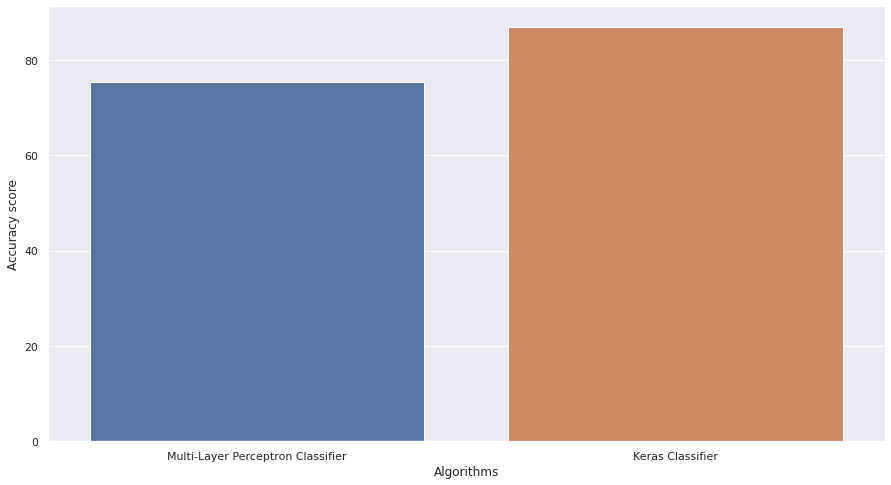

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

#**Recommendation**
Based on our insights, we would recommend that the senior citizens to maintain a reasonable body weight. Check your cholesterol level regularly, 
especially if your family has a history of heart disease. Avoid smoking tobacco, using intravenous drugs, or taking street drugs.